# Proyecto Mineria de Datos
## Indice de Precios al Consumidor
---
**Integrantes**
- Maria Marta Ramirez Gil
- Gustavo Andres Gonzalez Pineda 
- Diego Alberto Leiva Pérez 
- José Pablo Orellana Orellana 
- Gabriel Estuardo García Donis 
---

### Introducción

El Índice de Precios al Consumidor (IPC) mide la evolución de los precios de una canasta de bienes y servicios representativa del patrón de consumo de los habitantes de cada país.
El IPC es fundamental para entender la economía del país, ya que proporciona una visión clara de la inflación del país, un fenómeno que afecta de forma directa el poder adquisitivo de su población, y por consiguiente su calidad de vida.

Al analizar el histórico del IPC de Guatemala, se esperan poder identificar tendencias y patrones de evolución de los precios que afectan a diferentes regiones de la república y sectores económicos. 

El Instituto Nacional de Estadística (INE) desglosa este índice por productos y regiones geográficas, asi como por mes y año.

---

## Análisis Exploratorio

**Importar liberias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Normalizacion de strings
import unidecode

**Cargar los datos y unificarlos**

In [2]:
path = './Data/'

data_frames = []

for filename in os.listdir(path):
    if filename.endswith('.xls'):
        # Construir la ruta completa al archivo
        file_path = os.path.join(path, filename)
        # Leer el archivo excel y agregar el dataframe a la lista
        data_frames.append(pd.read_excel(file_path))

# Concatenar todos los dfs en uno solo
data = pd.concat(data_frames, ignore_index=True)

**Visualizar estructura e información general del dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69406 entries, 0 to 69405
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Año          69406 non-null  int64  
 1   Mes          69406 non-null  object 
 2   Código       69406 non-null  int64  
 3   Descripción  69406 non-null  object 
 4   Rep.         69406 non-null  float64
 5   Reg. I       69406 non-null  float64
 6   Reg. II      69406 non-null  float64
 7   Reg. III     69406 non-null  float64
 8   Reg. IV      69406 non-null  float64
 9   Reg. V       69406 non-null  float64
 10  Reg. VI      69406 non-null  float64
 11  Reg. VII     69406 non-null  float64
 12  Reg. VIII    69406 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.9+ MB


In [4]:
data.shape

(69406, 13)

13 columnas y 69,406 registros

In [5]:
data.head()

,Año,Mes,Código,Descripción,Rep.,Reg. I,Reg. II,Reg. III,Reg. IV,Reg. V,Reg. VI,Reg. VII,Reg. VIII
0,2001,Enero,0,INDICE GENERAL,101.370000,101.460000,101.900000,101.620000,101.150000,101.140000,100.990000,100.840000,100.810000
1,2001,Enero,1,"ALIMENTOS, BEBIDAS NO ALCOHOLICAS Y COMIDAS FU...",101.610000,101.880000,102.130000,102.050000,100.570000,101.510000,100.530000,100.710000,101.200000
2,2001,Enero,11111,ARROZ ...,100.551867,100.587352,100.533814,101.179906,99.999999,100.163800,100.804220,100.072486,99.554435
3,2001,Enero,11121,PAN ...,103.232662,104.553760,105.683420,100.009972,101.522448,96.854252,100.946695,102.449641,102.959418
4,2001,Enero,11131,PASTAS FRESCAS Y SECAS ...,101.660475,102.401848,102.524075,101.155608,100.618450,100.250022,101.049645,101.084236,102.817706


**Variables Identificadas:**
- Año: Representa el año en que se recopilaron los datos.
- Mes: Indica el mes correspondiente a cada registro.
- Código: Identificador numérico para cada producto o categoría de productos.
- Descripción: Detalle sobre el producto o categoría de productos al que se refiere el índice de precios.
- Rep.: Valor representativo para todo el país
- Reg. I: Valor representativo de la región Metropolitana.
- Reg. II: Valor representativo de la región Norte.
- Reg. III: Valor representativo de la región Nororiental.
- Reg. IV: Valor representativo de la región Suroriental.
- Reg. V: Valor representativo de la región Central.
- Reg. VI: Valor representativo de la región Suroccidental.
- Reg. VII: Valor representativo de la región Noroccidental.
- Reg. VIII: Valor representativo de la región Petén.

Las variables año, mes, codigo y registro son variables categóricas.

Las variables de regiones son númericas ya que contienen valores de los índices respectivos.

**Verificar existencia de valores nulos**

In [6]:
data.isnull().sum()

Año            0
Mes            0
Código         0
Descripción    0
Rep.           0
Reg. I         0
Reg. II        0
Reg. III       0
Reg. IV        0
Reg. V         0
Reg. VI        0
Reg. VII       0
Reg. VIII      0
dtype: int64

No hay valores faltantes o nulos.
De haber sido el caso contrario, entonces habría sido necesario analizar cuál es la proporción de nulos, y basado en ello eliminarlos (de ser una proporción mínima), de lo contrario sería necesario imputar 0 para variables numéricas, o imputar la moda para variables categóricas.

**Columnas con nombres mas practicos**

In [7]:
new_names = {
    'Año': 'anio',
    'Mes': 'mes',
    'Código': 'codigo',
    'Descripción': 'descripcion',
    'Rep.': 'pais',
    'Reg. I': 'region1',
    'Reg. II': 'region2',
    'Reg. III': 'region3',
    'Reg. IV': 'region4',
    'Reg. V': 'region5',
    'Reg. VI': 'region6',
    'Reg. VII': 'region7',
    'Reg. VIII': 'region8',
}

data.rename(columns=new_names, inplace=True)

**Estandarizacion de texto**

In [8]:
def standarize_str(input_str):
    """
    Funcion que toma un string y realiza estandarizacion removiendo tildes 
    y convirtiendolo a minusculas.

    Parameters:
    input_str (str): El string a procesar.

    Returns:
    str: El string estandarizado (sin tildes y en minuscula).
    """
    standar_str = unidecode.unidecode(input_str)
    standar_str = standar_str.lower()
    return standar_str

In [9]:
# Columnas categoricas con strings a normalizar
colums = ['mes','descripcion']

# Normalizar strings
for col in colums:
    data[col] = data[col].apply(standarize_str)

In [10]:
# Columnas numericas que se deben convertir a categoricas
colums = ['anio','codigo']

# Convertir a categoricas
for col in colums:
    data[col] = data[col].astype(str)

# Rellenar con ceros a la izquierda en la columna codigo
data['codigo'] = data['codigo'].str.zfill(2)

In [11]:
meses = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}

# Convierte los nombres de los meses a inglés
data['mes'] = data['mes'].apply(lambda x: meses[x])

# Combina las columnas 'Año' y 'Mes' en una nueva columna 'Fecha'
data['fecha'] = pd.to_datetime(data['anio'].astype(str) + '-' + data['mes'], format='%Y-%B')

# Elimina las columnas 'Año' y 'Mes'
data.drop(columns=['anio', 'mes'], inplace=True)

1. Se estandarizan los strings con el fin de mantener coherencia en las descripciones, evitando variaciones excesivas más allá de una redacción sencilla y uniforme.

2. Las columnas "año" y "código" se consideran variables categóricas debido a su naturaleza dentro de los datos, y por lo tanto se tratan como tales en el análisis.

3. Es mas facil analizar la informacion con una unica columna que abarque ambas columnas temporales (año y mes).

**Estadísticas descriptivas de las variables numéricas**

In [12]:
data.describe()

,pais,region1,region2,region3,region4,region5,region6,region7,region8,fecha
count,69406.000000,69406.000000,69406.000000,69406.000000,69406.000000,69406.000000,69406.000000,69406.000000,69406.000000,69406
mean,145.155011,133.033421,172.974989,135.328651,230.645981,137.125293,132.134601,156.046533,147.297774,2012-08-15 01:45:53.710053888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-01-01 00:00:00
25%,108.360000,107.200000,105.790000,106.311336,106.270000,105.690000,105.430000,103.840000,104.580000,2007-05-01 00:00:00
50%,117.890000,118.205000,116.050000,117.860000,119.770000,115.890000,114.510000,113.900000,113.270000,2013-02-01 00:00:00
75%,137.640000,138.115000,136.810000,135.660000,142.380000,134.530000,133.120000,136.050000,130.790000,2018-01-01 00:00:00
max,3992.220000,2209.690000,9879.290000,3436.830000,60211.130000,2285.100000,2168.580000,5182.990000,6798.260000,2022-12-01 00:00:00
std,145.217644,64.678597,396.842367,107.327489,1336.353370,91.226810,78.941524,221.945078,232.610948,NaN


Observaciones: 
- Media: Las medias varían significativamente entre regiones, lo que sugiere diferencias regionales en el comportamiento del IPC. Por ejemplo, la región 4 tiene una media notablemente alta (230.65) en comparación con otras regiones.
  
- Valores Mínimos: El hecho de que algunas regiones tengan un valor mínimo de 0 podría indicar que el producto o categoría de productos no sufrio ninguna variación en el IPC durante ese algún mes. Sin embargo es más probable que no la INE no obtuvo un dato válido en uno de sus registros.
  
- Desviación Estándar: Existe una variabilidad considerable en las desviaciones estándar, lo que indica que el grado de fluctuación del IPC no es uniforme entre las regiones. La región 4 muestra una desviación estándar excepcionalmente alta, lo que sugiere una gran volatilidad en los precios al consumidor.
  
- Región 4: Destaca por su alta media y desviación estándar extremadamente elevada, lo que indica un nivel promedio de IPC alto y una alta volatilidad en los precios. Esto podría deberse a factores económicos específicos de la región o a la presencia de valores atípicos.
  
- Outliers: La presencia de valores máximos extremadamente altos en varias regiones sugiere la existencia de valores atípicos, que podrían ser puntos de datos significativos o errores. Estos deberán ser investigados más a fondo para entender su naturaleza y su impacto en el análisis.
  
- Diversidad Regional: Las estadísticas sugieren que hay una diversidad significativa en el comportamiento del IPC a través de las regiones, lo que indica que factores regionales específicos podrían estar influyendo en la economía local.

**Gráficas exploratorias**

Se realizarán una serie de gráficos que permitiran explorar cómo diferentes variables influyen en los IPC de cada región. Asi como observar cual es la distribución de los datos.

Estas visualizaciones permiten observar rápidamente las tendencias y posibles relaciones entre variables.

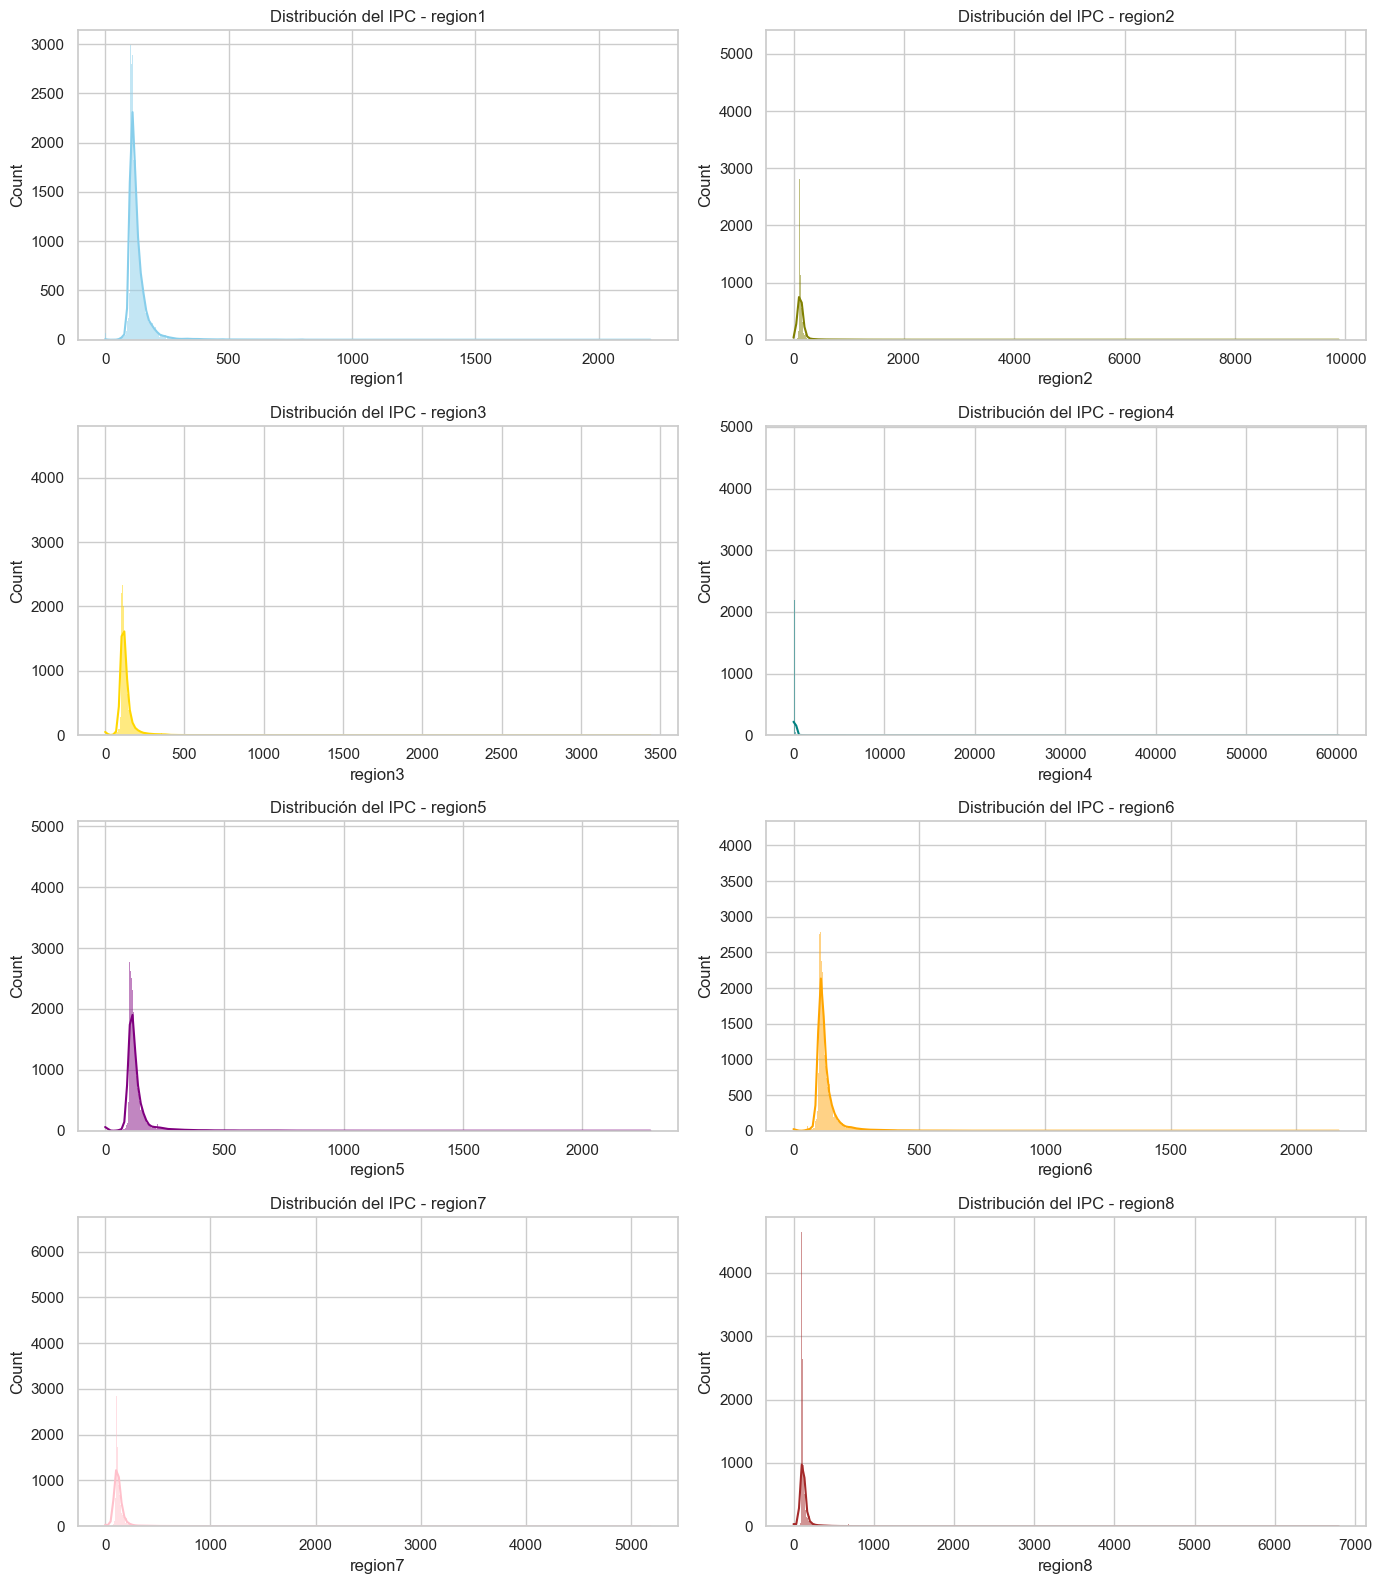

In [13]:
# Configuración de los gráficos
sns.set_theme(style="whitegrid")

# Crear una figura para múltiples gráficos
fig, axes = plt.subplots(4, 2, figsize=(14, 16))  # Ajusta según la cantidad de regiones

# Histograma para cada región
regiones = ['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7', 'region8']
colors = ['skyblue', 'olive', 'gold', 'teal', 'purple', 'orange', 'pink', 'brown']  # Colores para cada región

for i, (region, color) in enumerate(zip(regiones, colors)):
    ax = axes[i // 2, i % 2]  # Determina la posición del subplot
    sns.histplot(data[region], kde=True, color=color, ax=ax)
    ax.set_title(f'Distribución del IPC - {region}')

plt.tight_layout()
plt.show()


- Presencia de Outliers: En varias regiones, especialmente en la región 4, se observan valores muy altos que se desvían significativamente del resto de los datos, lo cual sugiere la presencia de outliers.

- Distribuciones Sesgadas: Todas las regiones muestran distribuciones sesgadas, algunas hacia la derecha (regiones 1, 3, 5, 7, 8) y otras con un sesgo aún más extremo y valores atípicos muy alejados (regiones 2, 4, 6). Esto sugiere que en todas las regiones el IPC tiene un rango de valores que no es uniforme y está influenciado por factores que varían regionalmente.